# Постановка задачи от заказчика

 Вам предлагается набор данных, содержащий комплектации различных моделей автомобилей и их характеристики.Мы предлагаем произвести с данным датасетом следующие операции:
1. Анализ данных
2. Фильтрация
3. Преобразование переменных
4. Классификация моделей по типу кузова (без подклассов, колонка type_car): - Седан - Хетчбек - Кроссовер - Внедорожник.

Обосновать выбранный подход/метод машинного обучения. Описать способ оценки качества модели машинного обучения.Необходимо детально описать все выполненные шаги.

# Постановка задачи машинного обучения

На вход дана таблица с автомобилями их признаками. Нужно по характеристикам авто определить тип кузова. 

Таргет напрямую не задан, необходимо его сформировать, и потом обучить классификатор с 4 классами, а так же выбрать лучшую модель, основываясь на самостоятельно выбранной метрике. (т.к. заказчик нам не предоставил метрику).

**План работ:**
1.  [Просмотр данных](#look_at_data)
2.  [Определение таргета](#target_derive)
3.  [Предобработка и анализ данных](#data_transformation)
4.  [Подготовка данных для машинного обучения](#prepare_to_ML)
5.  [Выбор метрики  качества машинного обучения](#metric)
6.  [Обучение моделей](#fit)
7.  [Обоснование выбора модели машинного обучения](#justyfy)
8.  [Проверка модели на тестовой выборке](#test_check)
9.  [Вывод](#outcome)

#### Импорт данных

In [61]:
#Общие библиотеки
import pandas as pd
import numpy as np
import random
from IPython.display import display
from IPython import display as display1

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.dummy import DummyClassifier


from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score,recall_score,r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 

#Графика
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz 

#Опции отображения в ноутбуке
pd.set_option("precision", 2)
np.set_printoptions(precision=2)

### Просмотр данных <a id='look_at_data'></a>

In [2]:
# прочитаем данные
df = pd.read_excel('auto_complectations.xlsx')
df.tail()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
1698,Volvo,XC90,D5 AT 5S R-Design,Большой кроссовер,5,5,дизельный (1969 см³),235 л. с.,480 Н·м,автоматическая (8 ступеней),...,7.8 секунды,220 км/ч,6.4 / 5.5 / 5.8,237 мм,4950 × 2008 × 1776,2984 мм,721 л,1899 л,71 л,1969 кг
1699,Volvo,XC90,T6 AT 7S R-Design,Большой кроссовер,7,5,бензиновый (1969 см³),320 л. с.,400 Н·м,автоматическая (8 ступеней),...,6.5 секунды,230 км/ч,0 / 0 / 8.3,237 мм,4950 × 2008 × 1776,2984 мм,692 л,1899 л,71 л,2004 кг
1700,Volvo,XC90,D5 AT 7S R-Design,Большой кроссовер,7,5,дизельный (1969 см³),235 л. с.,480 Н·м,автоматическая (8 ступеней),...,7.8 секунды,220 км/ч,6.4 / 5.5 / 5.8,237 мм,4950 × 2008 × 1776,2984 мм,692 л,1899 л,71 л,2009 кг
1701,Volvo,XC90,T8 AT 7S Inscription,Большой кроссовер,7,5,гибридный (1969 см³),407 л. с.,640 Н·м,автоматическая (8 ступеней),...,5.6 секунды,230 км/ч,0 / 0 / 2.1,237 мм,4950 × 2008 × 1776,2984 мм,640 л,1899 л,70 л,2350 кг
1702,Volvo,XC90,T8 AT 7S R-Design,Большой кроссовер,7,5,гибридный (1969 см³),407 л. с.,640 Н·м,автоматическая (8 ступеней),...,5.6 секунды,230 км/ч,0 / 0 / 2.1,237 мм,4950 × 2008 × 1776,2984 мм,640 л,1899 л,70 л,2350 кг


Была идея прменить лематизацию к колонкам ``['model','type_car','complec']``. Но думаю тут можно просто распарсить строку по пробелам.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   brand                                                 1703 non-null   object
 1   model                                                 1703 non-null   object
 2   complect                                              1703 non-null   object
 3   type_car                                              1703 non-null   object
 4   seats                                                 1703 non-null   int64 
 5   doors                                                 1703 non-null   int64 
 6   Двигатель                                             1703 non-null   object
 7   Мощность                                              1703 non-null   object
 8   Крутящий момент двигателя                             1703 non-null 

Мы получили на вход 1703 строки и 21 колонку. Пропусков нет. Необходимо приведение типов и переменование колонок, т.к. часть на русском, часть на английском.

In [4]:
#проверим на полные дубликаты дубликаты
df.duplicated().sum()

0

In [5]:
# переменуем колонки, приведем к единообразному виду
df.columns = ['brand', 'model', 'complect', 'type_car', 'seats', 'doors', 'engine',
       'power', 'engine_torque', 'transmission', 'drive_unit',
       'acceleration_to_100', 'max_speed',
       'fuel_consumption',
       'ground_clearence', 'length_width_height',
       'wheelbase', 'trunk_volume', 'trunk_volume_max',
       'fuel_tank_volume', 'car_weight']

In [6]:
df['model'].value_counts()

Range Rover Velar     34
Range Rover           31
E-Pace                29
Multivan              29
Range Rover Evoque    25
                      ..
S6                     1
V60 Cross Country      1
GT AMG                 1
GLE Coupe AMG          1
SQ8                    1
Name: model, Length: 246, dtype: int64

Посмотрем названия моделей, была идея сначала агрегировать их, потом стало ясно, что он будет категориальным, т.к. прослеживается явная связь между моделью и типом кузова. Дубликаты визуально осутствуют.

## Определение таргета <a id='target_derive'></a>

In [7]:
# распасим строку по пробелам
df['type_car_split'] = df['type_car'].str.lower().str.split(' ')

# посмотрим уникальные значения слов в типах авто
np.sort(np.unique(np.concatenate(df['type_car_split'].values)))

array(['a', 'b', 'c', 'd', 'e', 'f', 'большой', 'внедорожник', 'вэн',
       'горячий', 'кабриолет', 'класса', 'компактвэн', 'компактный',
       'кроссовер', 'крышей', 'купе', 'минивэн', 'мягкой', 'пикап',
       'повышенной', 'проходимости', 'родстер', 'с', 'седан', 'спорткупе',
       'спортседан', 'среднеразмерный', 'универсал', 'хэтчбек'],
      dtype='<U15')

In [8]:
#поменяем массив на множество
df['type_car_split'] = df['type_car_split'].apply(set)
df['type_car_split']

0         {класса, седан, c}
1         {класса, седан, c}
2         {класса, седан, c}
3         {класса, седан, c}
4         {класса, седан, c}
                ...         
1698    {большой, кроссовер}
1699    {большой, кроссовер}
1700    {большой, кроссовер}
1701    {большой, кроссовер}
1702    {большой, кроссовер}
Name: type_car_split, Length: 1703, dtype: object

In [9]:
# создадим таргет
df['target'] = df.apply(lambda row: row['type_car_split'] & {'купе','спорткупе','пикап','спортседан','седан', 'хэтчбек', 'кроссовер', 'внедорожник'}, axis=1)
df['target'] = df['target'].apply(lambda row:" ".join(word for word in row if word.isalpha()))

In [10]:
#заменим схожие типы авто на целевые
df = df.replace({'target' : {'купе':'хэтчбек',
                             'спорткупе':'хэтчбек',
                             'спортседан':'седан',
                             'пикап':'внедорожник'}})

In [11]:
# посмотрим записи, для которых отсутствует целевая переменная
not_target = df[~df['target'].isin (['купе','спорткупе','пикап','спортседан','седан', 'хэтчбек', 'кроссовер', 'внедорожник'])]
print("Количетво записей, не вошедшее в целевой признак -- {} в % выражении от всей выборки {:.1%} ".format(
    not_target.shape[0],
    not_target.shape[0]/df.shape[0]))

display(not_target[-50:-30])

Количетво записей, не вошедшее в целевой признак -- 162 в % выражении от всей выборки 9.5% 


,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,fuel_consumption,ground_clearence,length_width_height,wheelbase,trunk_volume,trunk_volume_max,fuel_tank_volume,car_weight,type_car_split,target
1516,Volkswagen,Caddy Maxi,Conceptline 2.0 TDI 110 hp MT6 4MOTION,Компактвэн,5,7,дизельный (1986 см³),110 л. с.,250 Н·м,механическая (6 ступеней),...,7.8 / 5.7 / 6.5,152 мм,4976 × 1793 × 1858,3006 мм,530 л,4130 л,60 л,1642 кг,{компактвэн},
1517,Volkswagen,Caddy Maxi,Trendline 1.4 TSI 125 hp AT7(DSG),Компактвэн,5,7,бензиновый (1390 см³),125 л. с.,220 Н·м,автоматическая (7 ступеней),...,6.7 / 5.2 / 5.7,158 мм,4976 × 1793 × 1858,3006 мм,530 л,4130 л,60 л,1423 кг,{компактвэн},
1518,Volkswagen,Caddy Maxi,Trendline 2.0 TDI 140 hp MT6,Компактвэн,5,7,дизельный (1986 см³),140 л. с.,320 Н·м,механическая (6 ступеней),...,7.4 / 5.3 / 6,158 мм,4976 × 1793 × 1858,3006 мм,530 л,4130 л,60 л,1608 кг,{компактвэн},
1519,Volkswagen,Caddy Maxi,Highline 1.6 MPI 110 hp MT5,Компактвэн,5,7,бензиновый (1598 см³),110 л. с.,155 Н·м,механическая (5 ступеней),...,9.1 / 6 / 7.1,158 мм,4976 × 1793 × 1858,3006 мм,530 л,4130 л,60 л,1438 кг,{компактвэн},
1520,Volkswagen,Caddy Maxi,Comfortline 1.4 TSI 125 hp AT7(DSG),Компактвэн,5,7,бензиновый (1390 см³),125 л. с.,220 Н·м,автоматическая (7 ступеней),...,6.7 / 5.2 / 5.7,158 мм,4976 × 1793 × 1858,3006 мм,530 л,4130 л,60 л,1423 кг,{компактвэн},
1521,Volkswagen,Caddy Maxi,Trendline 2.0 TDI 140 hp AT6 (DSG),Компактвэн,5,7,дизельный (1986 см³),140 л. с.,320 Н·м,роботизированная (6 ступеней),...,7.6 / 5.5 / 6.3,158 мм,4976 × 1793 × 1858,3006 мм,530 л,4130 л,60 л,1630 кг,{компактвэн},
1522,Volkswagen,Caddy Maxi,Comfortline 2.0 TDI 110 hp MT6 4MOTION,Компактвэн,5,7,дизельный (1986 см³),110 л. с.,250 Н·м,механическая (6 ступеней),...,8.3 / 5.9 / 6.7,152 мм,4976 × 1793 × 1858,3006 мм,530 л,4130 л,60 л,1720 кг,{компактвэн},
1523,Volkswagen,Caddy Maxi,Highline 1.4 TSI 125 hp AT7(DSG),Компактвэн,5,7,бензиновый (1390 см³),125 л. с.,220 Н·м,автоматическая (7 ступеней),...,6.7 / 5.2 / 5.7,158 мм,4976 × 1793 × 1858,3006 мм,530 л,4130 л,60 л,1423 кг,{компактвэн},
1524,Volkswagen,Caddy Maxi,Comfortline 2.0 TDI 140 hp MT6,Компактвэн,5,7,дизельный (1986 см³),140 л. с.,320 Н·м,механическая (6 ступеней),...,7.5 / 5.4 / 6.1,158 мм,4976 × 1793 × 1858,3006 мм,530 л,4130 л,60 л,1631 кг,{компактвэн},
1525,Volkswagen,Caddy Maxi,Comfortline 2.0 TDI 140 hp AT6 (DSG),Компактвэн,5,7,дизельный (1986 см³),140 л. с.,320 Н·м,роботизированная (6 ступеней),...,6.5 / 5.5 / 6.3,158 мм,4976 × 1793 × 1858,3006 мм,530 л,4130 л,60 л,1653 кг,{компактвэн},


Как мы видим 162 записи с универсалами, минивэнами, кабриолетами и т.д. не вошли в нашу

In [12]:
#удалим строки, которые не имеют целевых классов
df = df.drop(index=not_target.index)

In [13]:
#удалим данные о комплектации и источник создания таргета
df = df.drop(['complect','type_car','type_car_split'],axis=1)

Удалим информацию о комплектации т.к. обьем двигателя, тип КПП встречаются в других колонках, из которых будет ее проще достать. Плюс информация в данное колонке не структурирована и разнится для зазных обьектов

### Предобработка и анализ данных данных  <a id='data_transformation'></a>

In [14]:
#получение первого числа из строки
def take_first_value(series_input):
    series_output = series_input.str.split(' ').apply(lambda row:row[0])
    return series_output

# обрбаботка столбцов со значениями в скобках
def round_brackets(series_input):
    """ 
    Получает на вход Series
    на выходе имеем 2 Series - то что было до скобок и в скобках
    """   
    series_out = series_input.str.lower().str.split(' ')
    series_out_1 = series_out.apply(lambda row:row[0])
    series_out_2 = series_out.apply(lambda row:row[1][1:])
    return series_out_1,series_out_2

def draw_chart_series(series):
    """
    Отрисовывает плотность распределения фичи,
    Плотность распределений в разрезе таргета,
    И показывает границы 3 IQR (интерквантильный размах) 
    Берем с запасом, чтобы не отрезать лишнего
    """
    fig, axs = plt.subplots(3)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    fig.suptitle('Плотность распределения ' + series.name )
    sns.kdeplot(series,ax=axs[0])
    sns.kdeplot(series,hue=df['target'],ax=axs[1]);
    sns.boxplot(x = series,whis=2,ax=axs[2],sym='b+');

In [15]:
# преобразуем тит для колонки брэнд и модель
df['brand'] = df['brand'].astype('category')
df['model'] = df['model'].astype('category')
df['drive_unit'] = df['drive_unit'].astype('category')
df['target'] = df['target'].astype('category')

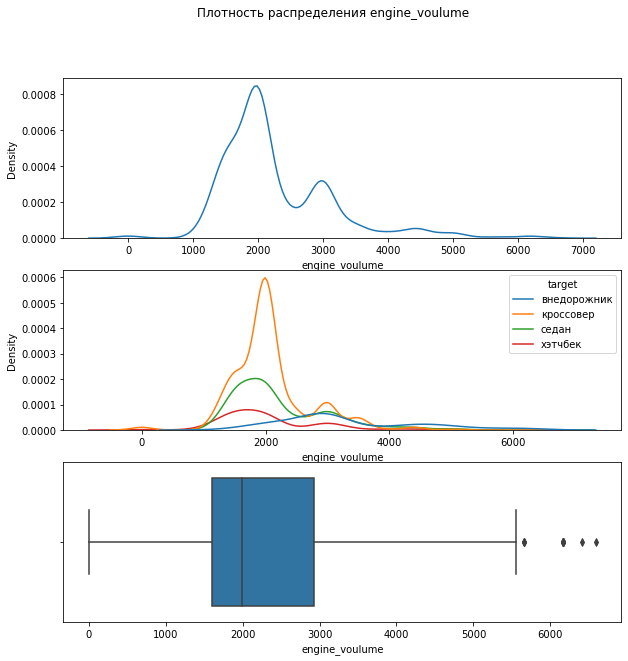

In [16]:
# получим тип двигателя и обьем
series_out_1,series_out_2 = round_brackets(df['engine'])
df['engine_type'] = series_out_1.astype('category')
df['engine_voulume'] = series_out_2.astype('int')

# посмотрим на распределения по обьему двигателя
draw_chart_series(df['engine_voulume'])

#удалим столбец engine
df = df.drop(['engine'],axis=1)

In [17]:
# посмотрим на упорядоченно осортированный тип двигателя
print(df['engine_type'].sort_values().unique())

# посмотрим на упорядоченно осортированный обьем двигателя
df['engine_voulume'].astype('int').sort_values().unique()

['бензиновый', 'гибридный', 'дизельный', 'электрический']
Categories (4, object): ['бензиновый', 'гибридный', 'дизельный', 'электрический']


array([   0,  998, 1197, 1199, 1248, 1249, 1332, 1353, 1368, 1373, 1390,
       1395, 1396, 1461, 1462, 1485, 1497, 1499, 1560, 1586, 1587, 1590,
       1591, 1595, 1598, 1600, 1798, 1950, 1968, 1969, 1984, 1985, 1986,
       1987, 1991, 1995, 1997, 1998, 1999, 2151, 2199, 2298, 2356, 2359,
       2360, 2393, 2442, 2457, 2487, 2488, 2494, 2497, 2498, 2694, 2755,
       2925, 2959, 2967, 2979, 2984, 2985, 2987, 2993, 2995, 2996, 2997,
       2998, 2999, 3342, 3445, 3456, 3470, 3498, 3564, 3597, 3604, 3649,
       3778, 3956, 3982, 3996, 4367, 4395, 4461, 4608, 4969, 4999, 5000,
       5038, 5552, 5663, 6162, 6417, 6592])

На первый взгляд получились вполне адекватные категориальные данные. Максимальный обьем мотора 6,5 л. - если это старый внедорожник, то это нормально.

In [18]:
# получим мощность и крутящий момент
df['power'] = take_first_value(df['power']).astype('int')
df['engine_torque'] = take_first_value(df['engine_torque']).astype('int')

In [19]:
# посмотрим на упорядоченно осортированный тип двигателя
print(df['power'].sort_values().unique())

# посмотрим на упорядоченно осортированный обьем двигателя
df['engine_torque'].sort_values().unique()

[ 67  82  84  85  90  92 100 102 106 109 110 113 114 115 116 117 121 122
 123 125 128 130 136 140 143 144 146 148 149 150 154 156 163 166 167 170
 171 175 177 178 180 181 184 185 186 188 190 192 194 197 199 200 209 211
 220 224 227 231 235 238 240 245 247 249 250 258 265 268 272 275 283 286
 294 296 299 300 306 309 313 315 318 320 326 330 333 335 339 340 350 354
 360 367 370 374 379 380 387 390 400 404 405 407 408 410 413 421 422 426
 435 450 460 462 468 477 480 510 525 530 550 557 565 571 575 585 600 609
 625 639]


array([  0,  95, 118, 122, 130, 132, 134, 141, 145, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 165, 180, 185, 189, 190, 192, 195, 196,
       197, 200, 202, 205, 206, 208, 210, 213, 220, 222, 229, 230, 231,
       232, 233, 235, 237, 239, 240, 241, 242, 243, 244, 245, 246, 250,
       257, 258, 265, 270, 279, 280, 290, 291, 294, 295, 300, 320, 325,
       330, 332, 335, 336, 340, 347, 350, 353, 356, 358, 360, 365, 370,
       380, 381, 386, 391, 400, 403, 407, 420, 422, 430, 438, 439, 440,
       450, 460, 475, 480, 495, 500, 505, 510, 520, 530, 540, 549, 550,
       560, 569, 570, 580, 588, 600, 610, 620, 624, 625, 640, 650, 660,
       664, 680, 696, 700, 730, 740, 750, 760, 800, 850, 900])

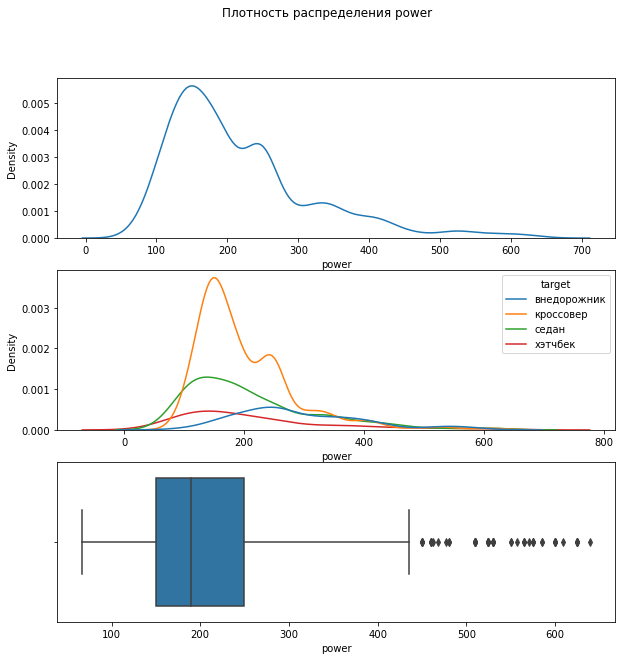

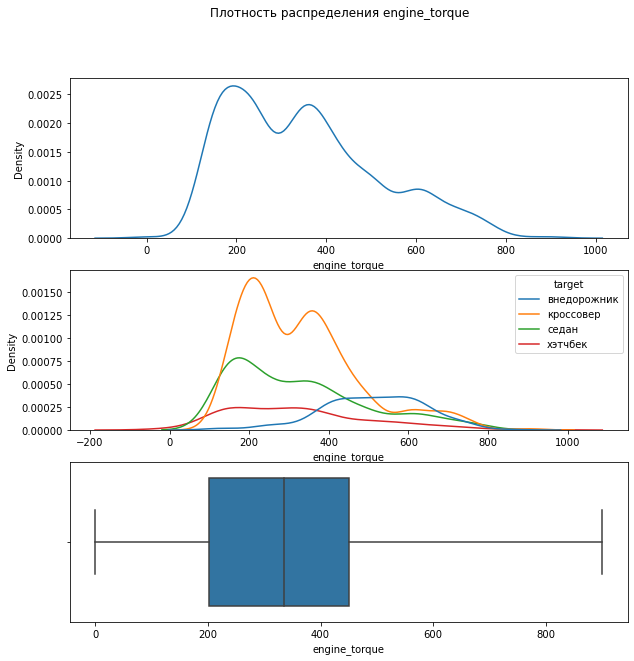

In [20]:
draw_chart_series(df['power'])
draw_chart_series(df['engine_torque'])

In [21]:
# посмотрим на тип трансмиссии
series_out_1,series_out_2 = round_brackets(df['transmission'])
df['transmission_type'] = series_out_1.astype('category')
df['transmission_voulume'] = series_out_2.astype('category')

#удалим столбец  transmission
df = df.drop(['transmission'],axis=1)

In [22]:
df.sort_values(by='engine_voulume')

,brand,model,seats,doors,power,engine_torque,drive_unit,acceleration_to_100,max_speed,fuel_consumption,...,wheelbase,trunk_volume,trunk_volume_max,fuel_tank_volume,car_weight,target,engine_type,engine_voulume,transmission_type,transmission_voulume
117,Audi,e-tron,5,5,408,664,полный,5.7 секунды,200 км/ч,0 / 0 / 0,...,2928 мм,660 л,1725 л,0 л,2555 кг,кроссовер,электрический,0,автоматическая,1
118,Audi,e-tron,5,5,408,664,полный,5.7 секунды,200 км/ч,0 / 0 / 0,...,2928 мм,660 л,1725 л,0 л,2555 кг,кроссовер,электрический,0,автоматическая,1
540,Jaguar,I-Pace,5,5,400,696,полный,4.8 секунды,200 км/ч,0 / 0 / 0,...,2990 мм,656 л,1453 л,0 л,2133 кг,кроссовер,электрический,0,автоматическая,0
218,BMW,i3,5,4,184,270,задний,6.9 секунды,160 км/ч,0 / 0 / 0,...,2570 мм,260 л,1100 л,0 л,1730 кг,хэтчбек,электрический,0,автоматическая,1
217,BMW,i3,5,4,170,250,задний,7.3 секунды,150 км/ч,0 / 0 / 0,...,2570 мм,260 л,1100 л,0 л,1710 кг,хэтчбек,электрический,0,автоматическая,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,Cadillac,Escalade,7,8,426,610,полный,6.7 секунды,180 км/ч,17.1 / 6.6 / 12.6,...,2910 мм,430 л,2667 л,98 л,2649 кг,внедорожник,бензиновый,6162,автоматическая,8
287,Cadillac,Escalade,7,8,426,610,полный,6.9 секунды,180 км/ч,17.1 / 6.6 / 12.6,...,3302 мм,1113 л,3424 л,117 л,2739 кг,внедорожник,бензиновый,6162,автоматическая,8
303,Chevrolet,Tahoe,7,8,426,610,полный,6.7 секунды,180 км/ч,18.3 / 10.6 / 13.4,...,2946 мм,433 л,2680 л,98 л,2549 кг,внедорожник,бензиновый,6162,автоматическая,8
582,Jeep,Grand Cherokee SRT8,5,5,468,624,полный,5 секунды,257 км/ч,20.5 / 10.1 / 14,...,2915 мм,782 л,1554 л,94 л,2347 кг,кроссовер,бензиновый,6417,автоматическая,8


In [23]:
df.columns

Index(['brand', 'model', 'seats', 'doors', 'power', 'engine_torque',
       'drive_unit', 'acceleration_to_100', 'max_speed', 'fuel_consumption',
       'ground_clearence', 'length_width_height', 'wheelbase', 'trunk_volume',
       'trunk_volume_max', 'fuel_tank_volume', 'car_weight', 'target',
       'engine_type', 'engine_voulume', 'transmission_type',
       'transmission_voulume'],
      dtype='object')

In [24]:
df[['acceleration_to_100', 'max_speed', 'fuel_consumption',
       'ground_clearence', 'length_width_height', 'wheelbase', 'trunk_volume',
       'trunk_volume_max', 'fuel_tank_volume', 'car_weight', 'target',
       'engine_type', 'engine_voulume', 'transmission_type',
       'transmission_voulume']]

,acceleration_to_100,max_speed,fuel_consumption,ground_clearence,length_width_height,wheelbase,trunk_volume,trunk_volume_max,fuel_tank_volume,car_weight,target,engine_type,engine_voulume,transmission_type,transmission_voulume
0,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг,седан,бензиновый,1395,роботизированная,7
1,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг,седан,бензиновый,1395,роботизированная,7
2,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг,седан,бензиновый,1984,роботизированная,7
3,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг,седан,бензиновый,1984,роботизированная,7
4,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг,седан,бензиновый,1984,роботизированная,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,7.8 секунды,220 км/ч,6.4 / 5.5 / 5.8,237 мм,4950 × 2008 × 1776,2984 мм,721 л,1899 л,71 л,1969 кг,кроссовер,дизельный,1969,автоматическая,8
1699,6.5 секунды,230 км/ч,0 / 0 / 8.3,237 мм,4950 × 2008 × 1776,2984 мм,692 л,1899 л,71 л,2004 кг,кроссовер,бензиновый,1969,автоматическая,8
1700,7.8 секунды,220 км/ч,6.4 / 5.5 / 5.8,237 мм,4950 × 2008 × 1776,2984 мм,692 л,1899 л,71 л,2009 кг,кроссовер,дизельный,1969,автоматическая,8
1701,5.6 секунды,230 км/ч,0 / 0 / 2.1,237 мм,4950 × 2008 × 1776,2984 мм,640 л,1899 л,70 л,2350 кг,кроссовер,гибридный,1969,автоматическая,8


In [25]:
df['acceleration_to_100'] = take_first_value(df['acceleration_to_100'])\
                                            .replace('нет',-1)\
                                            .astype(float)

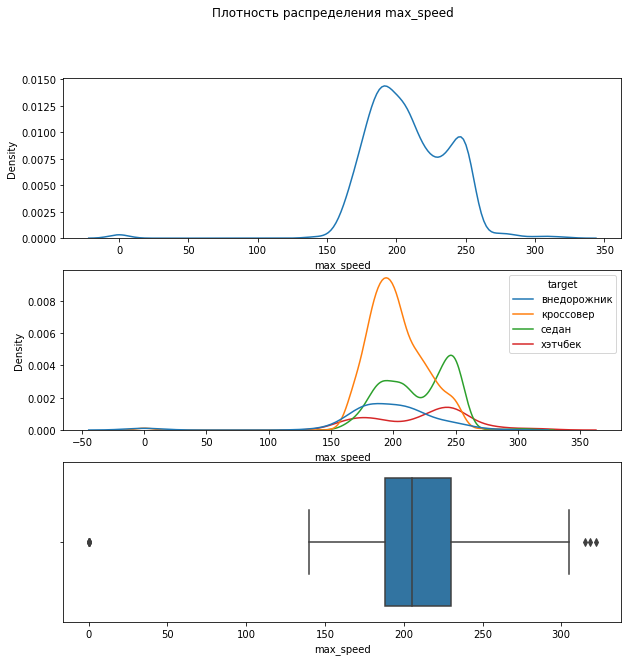

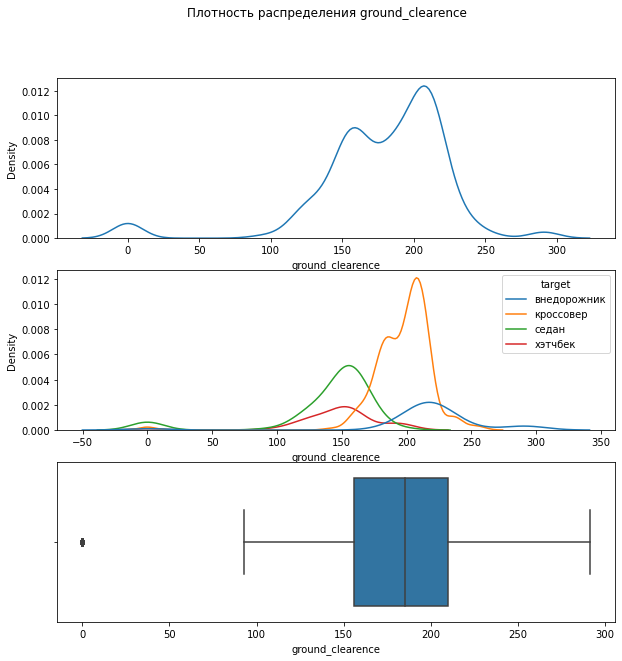

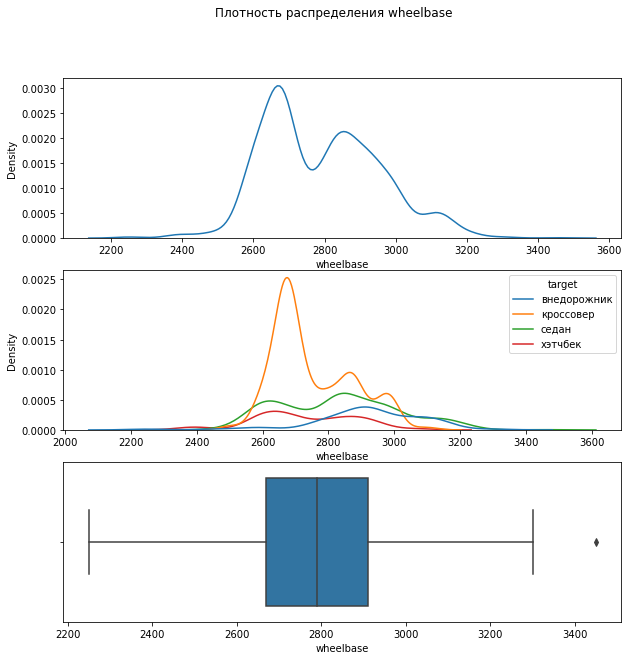

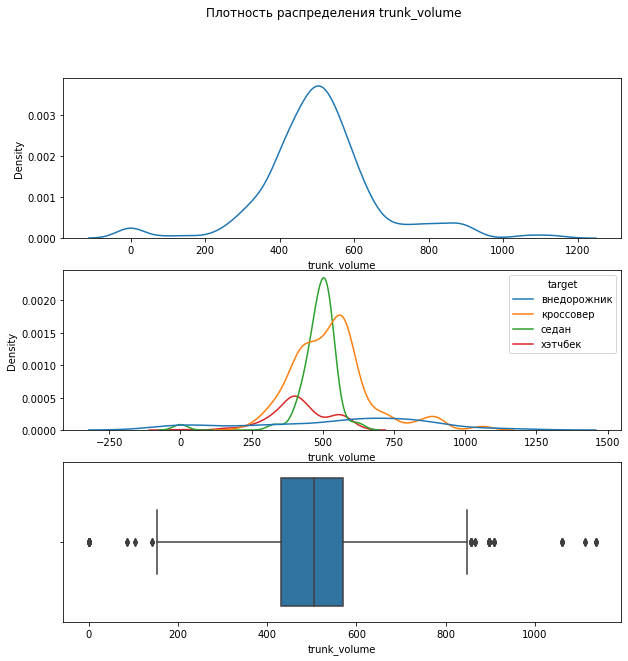

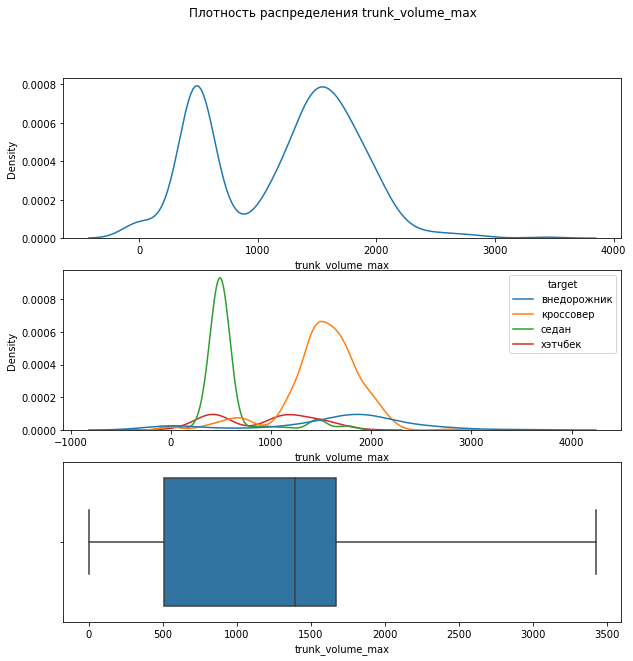

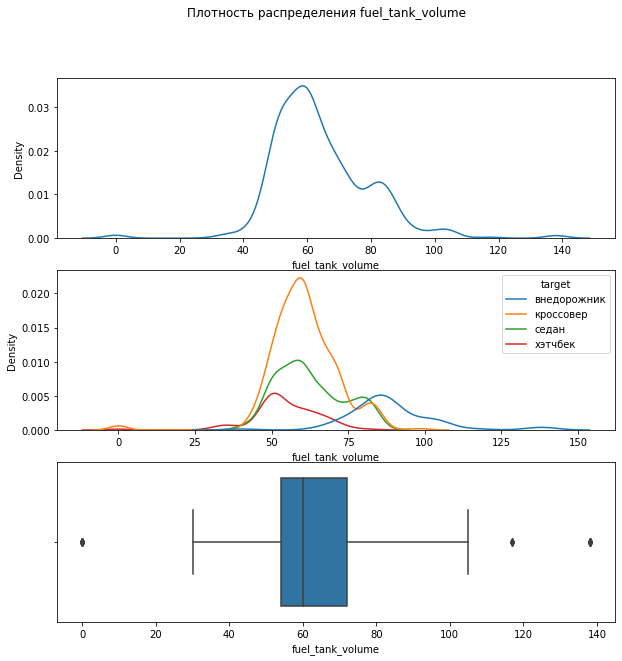

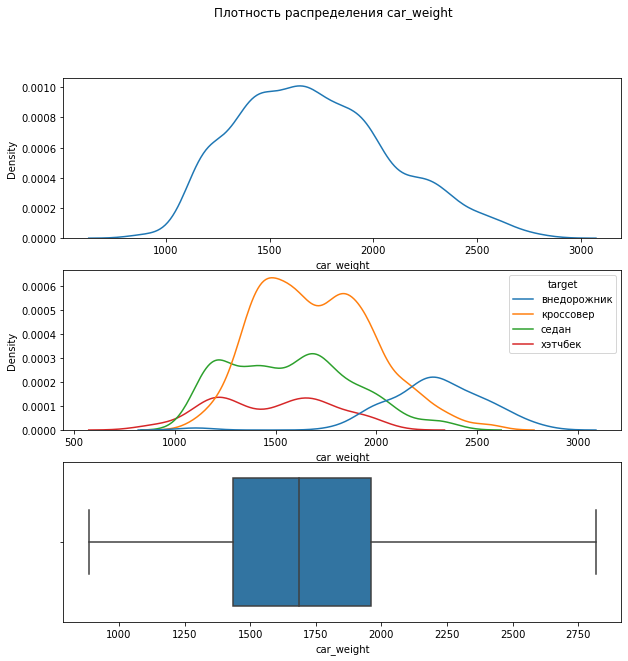

In [26]:
transform_signle_columns = ['max_speed',
                            'ground_clearence',
                            'wheelbase',
                            'trunk_volume',
                            'trunk_volume_max',
                            'fuel_tank_volume',
                            'car_weight']
for column in transform_signle_columns:
    df[column] = take_first_value(df[column]).astype('int')
    draw_chart_series(df[column])

Видно что многие признаки не поддаются закону нормального распределения. И их значения так же выходят за пределы 3-x кратного интерквартильного размаха. Возможно придется удалить часть данных, чтобы в дальнейшем улучшить качество модели.

In [27]:
df[['length_width_height','fuel_consumption']]       

,length_width_height,fuel_consumption
0,4458 × 1796 × 1416,5.9 / 4.1 / 4.8
1,4458 × 1796 × 1416,5.9 / 4.1 / 4.8
2,4458 × 1796 × 1416,7.2 / 4.7 / 5.6
3,4458 × 1796 × 1416,7.2 / 4.8 / 5.7
4,4458 × 1796 × 1416,7.2 / 4.7 / 5.6
...,...,...
1698,4950 × 2008 × 1776,6.4 / 5.5 / 5.8
1699,4950 × 2008 × 1776,0 / 0 / 8.3
1700,4950 × 2008 × 1776,6.4 / 5.5 / 5.8
1701,4950 × 2008 × 1776,0 / 0 / 2.1


In [28]:
for column in ['length_width_height','fuel_consumption']:
    df[column + '_1'] = df[column].str.split(' ').apply(lambda row:row[0]).astype(float)
    df[column + '_2'] = df[column].str.split(' ').apply(lambda row:row[2]).astype(float)
    df[column + '_3'] = df[column].str.split(' ').apply(lambda row:row[4]).astype(float)
    df=df.drop([column],axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1702
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand                  1541 non-null   category
 1   model                  1541 non-null   category
 2   seats                  1541 non-null   int64   
 3   doors                  1541 non-null   int64   
 4   power                  1541 non-null   int32   
 5   engine_torque          1541 non-null   int32   
 6   drive_unit             1541 non-null   category
 7   acceleration_to_100    1541 non-null   float64 
 8   max_speed              1541 non-null   int32   
 9   ground_clearence       1541 non-null   int32   
 10  wheelbase              1541 non-null   int32   
 11  trunk_volume           1541 non-null   int32   
 12  trunk_volume_max       1541 non-null   int32   
 13  fuel_tank_volume       1541 non-null   int32   
 14  car_weight             1541 non-null   i

In [30]:
#посмотрим распределение классов. 
df['target'].value_counts(normalize=True)

кроссовер      0.49
седан          0.27
внедорожник    0.13
хэтчбек        0.11
Name: target, dtype: float64

Видно что классы не сбалансированы, будем использовать соответствующий гиперпараметр при обучении моелей.

####  Проверка данных на мультиколинерность

In [31]:
#исследуем данные на мультиколлинеарность. 
corr_table = df.corr().unstack().sort_values(ascending=False).dropna()
#топ 10 по положиетельным корреляциями
corr_table = pd.DataFrame(corr_table,columns=['corr']).query('corr<1')
display(corr_table.head(20))
#топ 15 по отридцательным корреляциям
display( corr_table[-10::])

,,corr
fuel_consumption_2,fuel_consumption_1,0.94
fuel_consumption_1,fuel_consumption_2,0.94
wheelbase,length_width_height_1,0.92
length_width_height_1,wheelbase,0.92
engine_torque,power,0.84
power,engine_torque,0.84
car_weight,engine_torque,0.83
engine_torque,car_weight,0.83
length_width_height_2,car_weight,0.81
car_weight,length_width_height_2,0.81


corr
length_width_height_1 acceleration_to_100   -0.49
acceleration_to_100   length_width_height_1 -0.49
                      wheelbase             -0.52
wheelbase             acceleration_to_100   -0.52
car_weight            acceleration_to_100   -0.53
acceleration_to_100   car_weight            -0.53
                      engine_torque         -0.67
engine_torque         acceleration_to_100   -0.67
acceleration_to_100   power                 -0.68
power                 acceleration_to_100   -0.68

In [32]:
df = df.drop(['length_width_height_3','fuel_consumption_1','length_width_height_1'],axis=1)

Кофициент корреляции пирсона показывает линеную зависимость между переменными. Может быть отридцательной и положительной. Для выявления нелинейных взаимосвязей можно использовать ScatterPlot. Удаляя взаимосвязанные фичи мы препятствуем переобучению модели.

Полученные данные могут удивить аналитиков компании, обязательно передадим эту информацию в отдел маркетинга.

**Вывод**

В данном разделе мы завершили предобработку данных.
- Трансформировали значения столбцов в уникальные сущности модели
- Посмотрели на распределение численных значений, в т.ч. в разрезе целевой переменной
- Определили выбросы, которые могут помешать достигать высокого качества моделей
- провели типизацию данных, теперь датасэт будет занимать меньше времени в памяти и не будет проблем с кодированием признаков при подготовке модели машинного обучения.
- проверили данные на мультиколлинеарность
- удалили данные с сильной линейной взаимосвязью

### Подготовка данных для машинного обучения  <a id='prepare_to_ML'></a>

- Для различных типов моделей используют разное кодирование признаков Ordinal encoding - подходит больше для деревьев. Для линейных моделей необходим one-hot encoding (но можно так же встретиться с проклятием размерности, т.к. в типах авто у нас целых 220 категорий).
- В качестве нормирования данных будем использовать Standard Scaler, хотя есть альтернативы(MinMax,unit vector,MaxAbsScaler,Normalizer)
- Т.к. данных мало не будем делить на Train-Valid-test, а воспользуемся cross validation, т.е. будет только Train-Test, но на трейне будем валидироваться 5 раз со скользящем окном в соотношении train/valid 80/20. Соотношение  train/test возьмем 75/25.
- заметим что в данных будет ``leak`` если мы оставим в датасэте модель, т.к. можно будет явно определить, какой у этого авто тип кузова.

#### Избавимся от Leaks

In [33]:
df = df.drop(['model'],axis=1)

#### Кодирование данных

##### Ordinal Encoding

Для Деревьев решений и бустинга нужно применять технику Ordinal Encoding. В отличии от One Hot encoding эта техника не создает много столбцов с бинарным присвоением признака, а производит ранжирование в одном столбце.

In [34]:
#посмотрим категориальные переменые
df.select_dtypes(include='category')
category = df.select_dtypes(include='category')
category

,brand,drive_unit,target,engine_type,transmission_type,transmission_voulume
0,Audi,передний,седан,бензиновый,роботизированная,7
1,Audi,передний,седан,бензиновый,роботизированная,7
2,Audi,передний,седан,бензиновый,роботизированная,7
3,Audi,полный,седан,бензиновый,роботизированная,7
4,Audi,передний,седан,бензиновый,роботизированная,7
...,...,...,...,...,...,...
1698,Volvo,полный,кроссовер,дизельный,автоматическая,8
1699,Volvo,полный,кроссовер,бензиновый,автоматическая,8
1700,Volvo,полный,кроссовер,дизельный,автоматическая,8
1701,Volvo,полный,кроссовер,гибридный,автоматическая,8


In [35]:
#создадим encoder OE
encoder_OE = OrdinalEncoder()
df_OE = df.copy()
df_OE[category.columns] = pd.DataFrame(encoder_OE.fit_transform(df[category.columns]),columns=category.columns,index=df.index)
df_OE.sample(2)

,brand,seats,doors,power,engine_torque,drive_unit,acceleration_to_100,max_speed,ground_clearence,wheelbase,...,fuel_tank_volume,car_weight,target,engine_type,engine_voulume,transmission_type,transmission_voulume,length_width_height_2,fuel_consumption_2,fuel_consumption_3
1216,20.0,5,5,150,250,1.0,10.2,191,208,2721,...,50,1471,1.0,0.0,1332,1.0,0.0,1820.0,6.0,7.1
1591,25.0,5,4,110,155,1.0,11.7,184,163,2553,...,55,1208,2.0,0.0,1598,0.0,5.0,1699.0,4.7,5.9


#### Разделим  данные на тестовую и тренировочную выборки

Т.к. данных мало, то будем использовать кросс-валидацию. Т.е. валидационной выборки не будет, а будет только Train и test

In [36]:
def split_data(_df):
    X_train,X_test,y_train,y_test=train_test_split(_df.drop(labels=['target'], axis=1),
                                                    _df['target'],
                                                   shuffle=True,
                                                    test_size=0.25,
                                                    random_state=890,
                                                   stratify=_df['target'])
    print('размер выборок ----- ',X_train.shape,X_test.shape,y_train.shape[0],y_test.shape[0])
    return  X_train,X_test,y_train,y_test

# зазделим закодированные и сырые данные на трейн и тест 
X_train,X_test,y_train,y_test = split_data(df_OE)
X_train_OE,X_test_OE,y_train_OE,y_test_OE = split_data(df_OE)


размер выборок -----  (1155, 21) (386, 21) 1155 386
размер выборок -----  (1155, 21) (386, 21) 1155 386


В технике One-Hot Encoding, OHE создаются dummy variable, и при этом удаляется один столбец чтобы не попасть в дамми ловушку при обучении модели.

In [37]:
df_OHE = df.copy()
df_OHE.select_dtypes(include='category')

,brand,drive_unit,target,engine_type,transmission_type,transmission_voulume
0,Audi,передний,седан,бензиновый,роботизированная,7
1,Audi,передний,седан,бензиновый,роботизированная,7
2,Audi,передний,седан,бензиновый,роботизированная,7
3,Audi,полный,седан,бензиновый,роботизированная,7
4,Audi,передний,седан,бензиновый,роботизированная,7
...,...,...,...,...,...,...
1698,Volvo,полный,кроссовер,дизельный,автоматическая,8
1699,Volvo,полный,кроссовер,бензиновый,автоматическая,8
1700,Volvo,полный,кроссовер,дизельный,автоматическая,8
1701,Volvo,полный,кроссовер,гибридный,автоматическая,8


In [38]:
# OHE кодирование
df_OHE = df.copy()
#df_OHE.drop(['model'],axis=1,inplace=True)
category_OHE = df_OHE.select_dtypes(include='category').drop('target',axis=1)
df_OHE_tmp = pd.get_dummies(df_OHE[category_OHE.columns],drop_first=True)

#удалим данные
df_OHE = df_OHE.drop(category_OHE.columns,axis=1)
df_OHE = df_OHE.join(df_OHE_tmp).copy()
df_OHE.sample(3)

# разделим OHE на train и test
X_train_OHE,X_test_OHE,y_train_OHE,y_test_OHE = split_data(df_OHE)

размер выборок -----  (1155, 58) (386, 58) 1155 386


284 колонки, доаольно большая размерность. Поробуем метод PCA.  Основная идея заключается в нахождении таких попарно ортогональных направлений в исходном многомерном пространстве, вдоль которых данные имеют наибольший разброс (выборочную дисперсию). Эти направления называются главными компонентами.

#### PCA (метод главных компонент)

In [39]:
X_train_OHE

,seats,doors,power,engine_torque,acceleration_to_100,max_speed,ground_clearence,wheelbase,trunk_volume,trunk_volume_max,...,transmission_type_механическая,transmission_type_роботизированная,transmission_voulume_1,transmission_voulume_10,transmission_voulume_4,transmission_voulume_5,transmission_voulume_6,transmission_voulume_7,transmission_voulume_8,transmission_voulume_9
1002,5,4,150,250,8.1,230,0,2729,420,420,...,0,1,0,0,0,0,0,1,0,0
476,5,5,185,400,9.5,201,182,2670,488,1478,...,0,0,0,0,0,0,0,0,1,0
181,5,4,190,400,7.5,235,144,2975,520,520,...,0,0,0,0,0,0,0,0,1,0
1198,5,7,150,240,9.2,206,236,2840,1060,2150,...,0,0,0,0,0,0,1,0,0,0
843,5,5,180,430,9.3,205,212,2681,591,1383,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,5,7,249,600,8.1,209,228,2923,1137,2500,...,0,0,0,0,0,0,0,0,1,0
1676,5,5,190,400,8.4,205,216,2865,505,1432,...,0,0,0,0,0,0,0,0,1,0
1130,5,5,144,200,10.5,182,200,2646,430,1513,...,0,0,0,0,0,0,0,0,0,0
72,5,4,249,600,6.5,250,0,2924,530,530,...,0,0,0,0,0,0,0,0,1,0


In [40]:
#посмотрим как работает PCA
pca = PCA(n_components=3)
pca.fit(X_train_OHE)
PCA(n_components=2,svd_solver='full')
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

X_train_PCA = pca.fit_transform(X_train_OHE)
X_test_PCA = pca.transform(X_test_OHE)
y_train_PCA = y_train_OHE 
y_test_PCA = y_test_OHE

[0.65 0.27 0.05]
[32465.55 20689.87  8997.11]


Как мы видим, метот снижения 3  размеронсти  3 признаками обьясняет  95% дисперсии. Неплохой результат Будем пытаться обучить модели на всем датасэте. Правда этот подход сразу уменьшает прозрачность решения, т.к. модель становится тяжело интерпретируемой.

#### Mutual Information(MI)

Mutual Information(MI) проверяет взаимосвязанность величин, используя верояностный подход. I(X ; Y) = H(X) — H(X | Y). Метод похож на просмотр важных  фич в баесовском классификаторе. Основываясь на этот методе мы можем отбросить не важные признаки

In [41]:
mutual_info = mutual_info_classif(X_train, y_train)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

trunk_volume_max         1.00
trunk_volume             0.88
wheelbase                0.85
length_width_height_2    0.84
ground_clearence         0.77
car_weight               0.58
doors                    0.52
fuel_tank_volume         0.51
engine_voulume           0.38
max_speed                0.36
engine_torque            0.34
power                    0.31
brand                    0.29
fuel_consumption_3       0.28
fuel_consumption_2       0.27
acceleration_to_100      0.24
drive_unit               0.18
transmission_voulume     0.14
seats                    0.06
engine_type              0.06
transmission_type        0.05
dtype: float64

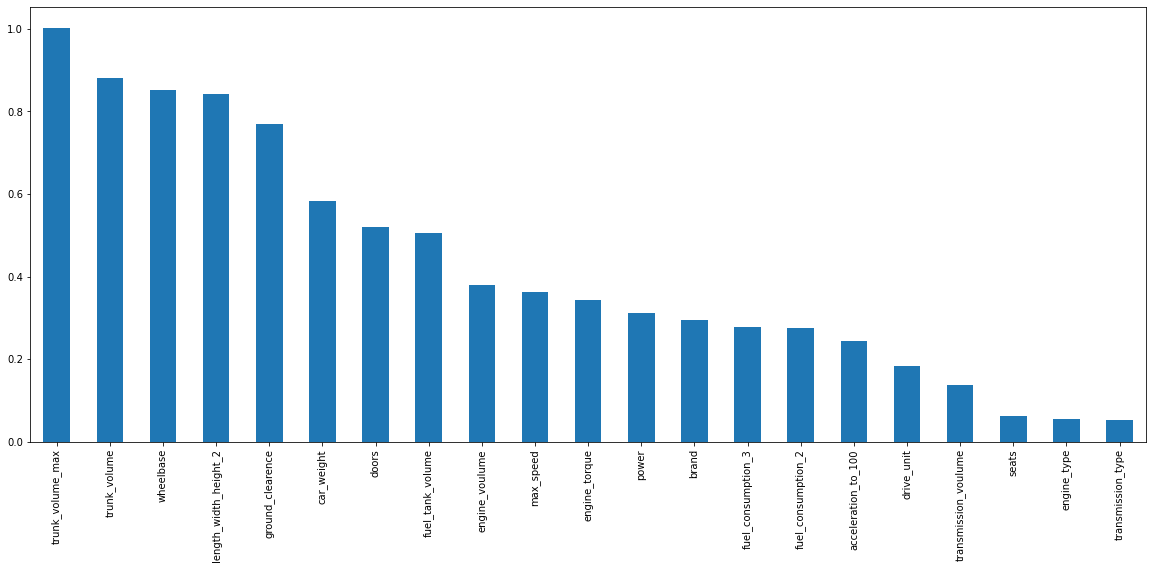

In [42]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

In [43]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

trunk_volume_max         1.00
trunk_volume             0.88
wheelbase                0.85
length_width_height_2    0.84
ground_clearence         0.77
car_weight               0.58
doors                    0.52
fuel_tank_volume         0.51
engine_voulume           0.38
max_speed                0.36
engine_torque            0.34
power                    0.31
brand                    0.29
fuel_consumption_3       0.28
fuel_consumption_2       0.27
acceleration_to_100      0.24
drive_unit               0.18
transmission_voulume     0.14
seats                    0.06
engine_type              0.06
transmission_type        0.05
dtype: float64

#### SelectKBest

Как можно понять по назавния, выбирает наилучшие признаки в соответсвии с моделью KNN

In [44]:
def k_best(k):
    """
    Выбирает наилучшие признаки в соответсвии с моделью KNN
    """
    sel_cols = SelectKBest(mutual_info_classif, k=k)
    sel_cols.fit(X_train, y_train)
    columns = X_train.columns[sel_cols.get_support()]
    print(columns.values)
    return columns
columns = k_best(18)    

['brand' 'doors' 'power' 'engine_torque' 'drive_unit'
 'acceleration_to_100' 'max_speed' 'ground_clearence' 'wheelbase'
 'trunk_volume' 'trunk_volume_max' 'fuel_tank_volume' 'car_weight'
 'engine_voulume' 'transmission_voulume' 'length_width_height_2'
 'fuel_consumption_2' 'fuel_consumption_3']


In [45]:
# посмотрим cимметрическую разницу множеств
set(columns.values)^set(df_OE.columns)

{'engine_type', 'seats', 'target', 'transmission_type'}

Этим методм посмотрели кандидатов на выбывание из датасэта ``['engine_type', 'seats', 'transmission_type']`` . 2 метода подтвердили малую важность этих признаков для модели, удалим эти признаки.

In [46]:
df = df.drop( ['engine_type', 'seats', 'transmission_type'],axis=1)
df_OE = df_OE.drop( ['engine_type', 'seats', 'transmission_type'],axis=1)
#df_OHE = df_OHE.drop( ['engine_typ', 'seats', 'transmission_type'],axis=1)


# т.к. мы изменили датафрэймы разделим закодированные и сырые данные на трейн и тест 
X_train,X_test,y_train,y_test = split_data(df_OE)
X_train_OE,X_test_OE,y_train_OE,y_test_OE = split_data(df_OE)
X_train_OHE,X_test_OHE,y_train_OHE,y_test_OHE = split_data(df_OHE)

размер выборок -----  (1155, 18) (386, 18) 1155 386
размер выборок -----  (1155, 18) (386, 18) 1155 386
размер выборок -----  (1155, 58) (386, 58) 1155 386


#### Масштабирование признаков

Чтобы каждый признак был равнозначен, необходимо их нормировать. Но нормирование нужно не для всех алгоритмов, например для деревьев не нужно. Обычно испоьзуют стандартизацию или нормализацию.

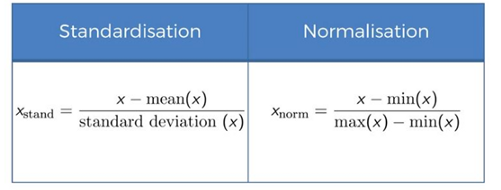

In [47]:
#смасштабируем данные
def scale_data(train,test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    train = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
    test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
    return train,test

X_train,X_test 
X_train_OE,X_test_OE = scale_data(X_train_OE ,X_test_OE )
X_train_OHE,X_test_OHE = scale_data(X_train_OHE,X_test_OHE)

In [48]:
X_train_OE

,brand,doors,power,engine_torque,drive_unit,acceleration_to_100,max_speed,ground_clearence,wheelbase,trunk_volume,trunk_volume_max,fuel_tank_volume,car_weight,engine_voulume,transmission_voulume,length_width_height_2,fuel_consumption_2,fuel_consumption_3
0,0.31,-0.89,-0.64,-0.58,-1.09,-0.15,0.70,-3.82,-0.37,-5.26e-01,-1.28,-1.37,-0.69,-1.04,0.23,-0.84,-4.55e-01,-0.91
1,-0.70,0.17,-0.29,0.32,0.73,0.35,-0.21,0.08,-0.73,-1.03e-01,0.44,-0.12,-0.06,-0.29,0.70,-0.28,5.44e-03,-0.38
2,-1.45,-0.89,-0.24,0.32,-2.91,-0.36,0.86,-0.74,1.13,9.59e-02,-1.11,0.14,-0.21,-0.29,0.70,-0.09,-4.13e-01,-1.09
3,0.82,2.28,-0.64,-0.64,-1.09,0.24,-0.05,1.23,0.31,3.45e+00,1.53,-0.52,-0.56,-0.74,-0.23,-0.34,-1.62e-01,-0.69
4,-0.06,0.17,-0.34,0.50,0.73,0.28,-0.08,0.72,-0.67,5.37e-01,0.29,0.08,0.20,-0.29,1.16,1.24,-2.25e+00,-0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,-0.06,2.28,0.34,1.53,0.73,-0.15,0.04,1.06,0.82,3.93e+00,2.10,1.39,1.39,0.84,0.70,2.04,5.91e-01,0.11
1151,1.70,0.17,-0.24,0.32,0.73,-0.04,-0.08,0.81,0.46,2.62e-03,0.37,-0.25,0.70,-0.32,0.70,0.26,-2.88e-01,-0.96
1152,0.57,0.17,-0.70,-0.89,0.73,0.70,-0.81,0.46,-0.88,-4.64e-01,0.50,-0.25,-0.56,-0.29,-2.56,-0.42,2.57e-01,0.03
1153,-1.58,-0.89,0.34,1.53,0.73,-0.71,1.33,-3.82,0.82,1.58e-01,-1.10,0.60,0.52,0.82,0.70,0.09,1.31e-01,-0.38


### Выбор метрики  качества машинного обучения  <a id='metric'></a>

У нас задача классификации, поэтому выбор между метриками:
- accuracy
- precision
- recall
- F-measure(F1)
- AUC-ROC и AUC-PR
- Logistic Loss

    Метрика  ``accuracy`` -наглядная метрика, показывает долю правильных ответов модели.

    Ошибки бывают двух видов: ложноположительные и ложноотрицательные. И в случае если один из этих типов ошибок нам более страшен - мы постараемся его не допускать, даже в ущерб ошибкам другого типа.``F-мера`` же представляет собой гармоническое среднее между ``precision и recall``. Она стремится к нулю, если любой из этих параметров стремится к нулю. Эту метрику мы хотим видеть высокой если нам важен баланс.

    Метрика AUC-ROC и AUC-PR нам не подходит т.к. сильный дисбаланс классов. Но с ним тоже можно бороться с помощью техник ``Upsampling/Downsampling``

    ``LogLoss`` метрика сложно интерпретируема.
 
Т.к. заказчик не предьявлял требования к метрикам и не давал дополнительных вводных, выберем метрику **accuracy** т.к. она прозрачна и показывает долю правильных ответов

### Обучение моделей  <a id='fit'></a>
Рассмотрим несколько типов моделей, выберем одну и проверим ее уже на тесте:
- будем использовать GridSerach, т.к. он эффективней чем просто перебор циклов RandomizedSearchCV в данном случае не нужен т.к. датасэт небольшой. Обычно RandomizedSearch ищем набор параметров, а потом  GridSerach уже ищем конкретные параметры модели.
- Проверим как классифицирует глупая модель. В нашем случае это будет бэйзлайном.

- В обучении будем использовать модели KNN, Decission Tree, Random Forest


**DummyClassifier (Baseline)**

In [49]:
%%time
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)
scores = cross_val_score( dummy_clf, X_train, y_train, cv=10, scoring='accuracy')
print('accuracy у глупой модели -- ' ,scores.mean())

accuracy у глупой модели --  0.25551724137931037
Wall time: 15 ms


Наша модель не должна ошибаться больше чем глупая модель

In [50]:
# Функция поиска оптимальных гиперпараметров модели на кросс валидации
def grid_CV_pipe(X,y,params,model):
    """
    Обучение модели,
    Расчет и отображение параметров лучшей моедли GridSearchCV
    Включая кривые обучения
    """
    # Обучение модели
    grid = GridSearchCV(model, params,
                        cv = 5,
                        scoring = 'accuracy',
                        return_train_score=True,
                        n_jobs=-1)
    grid.fit(X,y)

    #Вывод
    print (grid.best_score_)
    print (grid.best_params_)
    print (grid.best_estimator_)
    
    #посмотрим лучшие результаты GridSearchCV
    rs_df = pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score').reset_index(drop=True)
    rs_df = rs_df.drop([
                'mean_fit_time', 
                'std_fit_time', 
                'mean_score_time',
                'std_score_time', 
                'params', 
                'split0_test_score', 
                'split1_test_score', 
                'split2_test_score',
                'split0_train_score',
                'split1_train_score',
                'split2_train_score',
                'split3_train_score',
                'split4_train_score',
                'std_test_score'],
                axis=1)
    display(rs_df.T)
    
    # Посмотрим на кривые обучения
    plt.rcParams['figure.figsize'] = (15.0, 6.0)
    test_scores = rs_df['mean_test_score']
    train_scores = rs_df['mean_train_score'] 
    plt.plot(test_scores, label='test')
    plt.plot(train_scores, label='train')
    plt.legend(loc='best')
    plt.title('Кривые обучения')
    plt.show()
    

#### KNN model

0.9766233766233767
{'n_neighbors': 4, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=4, weights='distance')


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
param_n_neighbors,4,8,1,1,2,5,3,9,6,14,...,10,11,13,14,12,15,16,17,18,19
param_weights,distance,distance,uniform,distance,distance,distance,distance,distance,distance,distance,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
split3_test_score,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.99,0.98,0.99,...,0.92,0.9,0.91,0.9,0.9,0.89,0.87,0.87,0.87,0.87
split4_test_score,0.97,0.96,0.96,0.96,0.96,0.96,0.96,0.95,0.95,0.96,...,0.9,0.92,0.91,0.91,0.92,0.9,0.89,0.9,0.89,0.88
mean_test_score,0.98,0.98,0.97,0.97,0.97,0.97,0.97,0.97,0.97,0.97,...,0.91,0.9,0.9,0.9,0.9,0.89,0.88,0.87,0.87,0.86
rank_test_score,1,2,3,3,3,6,6,8,8,10,...,29,30,30,32,33,34,35,36,37,38
mean_train_score,1,1,1,1,1,1,1,1,1,1,...,0.94,0.92,0.92,0.91,0.92,0.91,0.9,0.89,0.88,0.88
std_train_score,0,0,0,0,0,0,0,0,0,0,...,0.0027,0.0057,0.0059,0.0041,0.0061,0.0047,0.01,0.0065,0.0062,0.0075


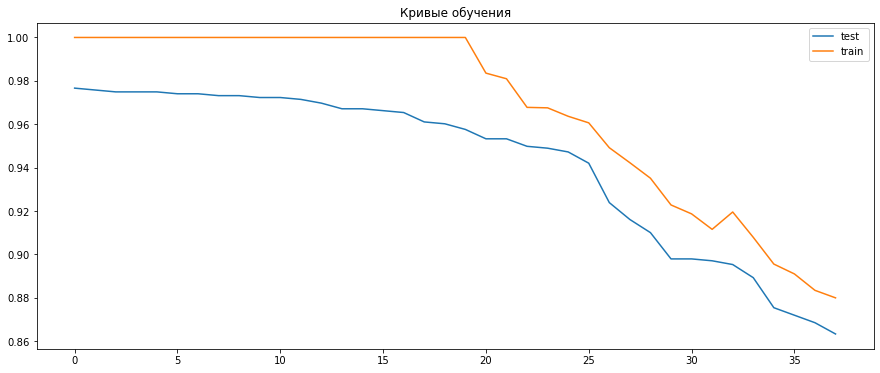

Wall time: 3.12 s


In [51]:
%%time
knn = KNeighborsClassifier()
params_knn = {  'weights': ["uniform", "distance"],
                 'n_neighbors': list(range(1,20))}
grid_CV_pipe(X_train_OE,y_train_OE,params_knn,knn)

In [52]:
# посмотрим в диапазоне до 4 соседей важность признаков
for k in range(1,5):
    k_best(k)    

['trunk_volume_max']
['trunk_volume' 'trunk_volume_max']
['wheelbase' 'trunk_volume' 'trunk_volume_max']
['wheelbase' 'trunk_volume' 'trunk_volume_max' 'length_width_height_2']


Чем меньше расстояние между объектами, тем больше объекты похожи друг на друга. Алгоритм получил лучший результат всего по одному обьекту, хоть мы и убрали информацию о столбце ``model``. Похоже обьем бака сильно влияет на классификацию кузова. С увеличениям числа соседей начинает падать score т.к. увеличивается метрика рассотяния.

### RandomForestClassifier

0.9974025974025974
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': 100, 'min_samples_split': 2, 'n_estimators': 20}
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=7,
                       max_features='sqrt', max_leaf_nodes=100, n_estimators=20,
                       random_state=890)


,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
param_bootstrap,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
param_criterion,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy,...,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy
param_max_depth,7,7,9,9,9,9,9,8,9,9,...,2,2,2,2,2,2,2,2,2,2
param_max_features,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,...,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt
param_max_leaf_nodes,100,100,None,100,100,100,100,100,100,None,...,None,100,100,100,100,None,None,None,None,100
param_min_samples_split,3,2,2,3,3,4,4,5,5,3,...,5,5,2,3,4,2,3,4,5,5
param_n_estimators,20,20,100,20,100,20,100,100,100,100,...,2,2,2,2,2,2,2,2,2,2
split3_test_score,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,...,0.76,0.76,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79
split4_test_score,1,1,1,1,1,1,1,1,1,1,...,0.77,0.77,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79
mean_test_score,1,1,1,1,1,1,1,1,1,1,...,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79


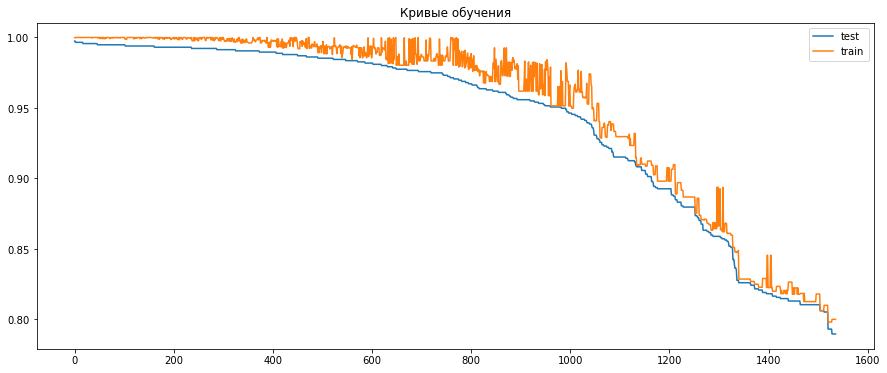

Wall time: 1min 18s


In [53]:
%%time
rfc = RandomForestClassifier(random_state=890)
params = {'max_depth': range(2, 10),
             'n_estimators': [2, 20, 100],
             'criterion': ['entropy', 'gini'],
             'max_features': ['sqrt', None], 
             'min_samples_split' : range(2, 6),
             'max_leaf_nodes' : [100, None],
             'bootstrap' : [True, False]}
grid_CV_pipe(X_train_OE,y_train,params,rfc)

Видим, что при увеличении количества деревьев и глубины модель начинает сильно переобучатся.  Пики на трейне получаются что GridSearch проходит циклами по сети. По хорошему нужен отдельный график для каждого гиперпараметра.

 n_estimators — число «деревьев» в «случайном лесу».
<br> max_features — число признаков для выбора расщепления.
<br> max_depth — максимальная глубина деревьев.
<br> min_samples_split — минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться.
<br> min_samples_leaf — минимальное число объектов в листьях.
<br> bootstrap — использование для построения деревьев подвыборки с возвращением.

При значениях параметров n_iter = 20 и cv = 5, мы создали 30 RF-моделей, случайно выбирая комбинации представленных выше гиперпараметров.

### DecisionTreeClassifier

0.9913419913419913
{'class_weight': None, 'criterion': 'gini', 'max_depth': 9}
DecisionTreeClassifier(max_depth=9, random_state=890)


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
param_class_weight,None,None,None,None,None,None,balanced,balanced,balanced,balanced,...,balanced,None,None,None,balanced,balanced,None,None,balanced,balanced
param_criterion,gini,entropy,entropy,entropy,entropy,gini,gini,gini,gini,entropy,...,entropy,gini,gini,entropy,gini,entropy,gini,entropy,entropy,gini
param_max_depth,9,7,6,9,8,8,9,8,7,7,...,3,3,2,2,2,2,1,1,1,1
split3_test_score,0.99,0.98,0.98,0.99,0.99,0.98,0.98,0.98,0.98,0.98,...,0.85,0.89,0.83,0.79,0.79,0.79,0.73,0.69,0.39,0.38
split4_test_score,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.98,0.98,...,0.88,0.87,0.84,0.78,0.78,0.77,0.71,0.7,0.39,0.39
mean_test_score,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,...,0.88,0.88,0.83,0.81,0.81,0.81,0.73,0.7,0.39,0.38
rank_test_score,1,1,3,4,4,6,7,7,9,10,...,27,28,29,30,30,32,33,34,35,36
mean_train_score,1,1,1,1,1,1,1,1,1,1,...,0.89,0.89,0.83,0.81,0.81,0.81,0.73,0.71,0.39,0.39
std_train_score,0,0.0013,0.0011,0,0.00043,0.0023,0,0.00053,0.0019,0.00053,...,0.0054,0.009,0.0033,0.0074,0.0074,0.0055,0.0018,0.005,0.00043,0.0031


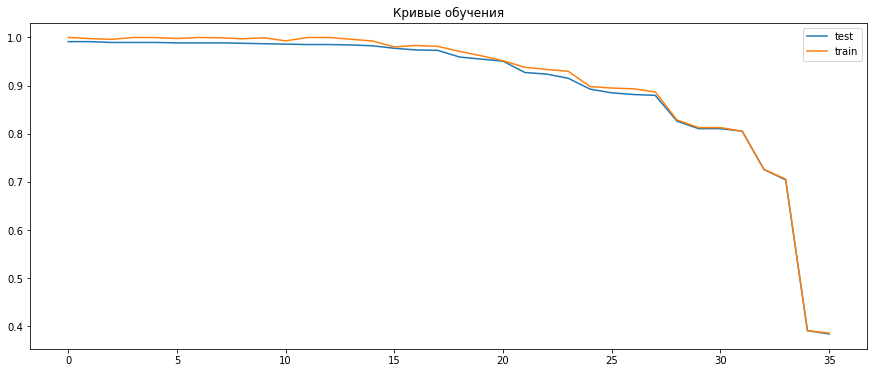

Wall time: 362 ms


In [54]:
%%time
model_tree = DecisionTreeClassifier(random_state=890)
tree_param = {'criterion':['gini','entropy'],
              'class_weight':[None,'balanced'],
              'max_depth':list(range(1,10))}

grid_CV_pipe(X_train_OE,y_train,tree_param,model_tree)

### Обоснование выбора модели машинного обучения <a id='justyfy'></a>

Основными параметрами для выбора модели будут(в порядке убывания):
- интерпретируемость   
- точность метрики
- скорость работы алгоритма

**Вывод:**
    
В данном случае нет смысла использовать ансамблевые модели, т.к. простые модели дают очень высокий результат. Важным аспектом стала интерпретируемость модели, поэтому мы будем смотреть как дерево решений поведет себя на тесте.    

Мы умышленно не пробовали линейные модели, т.к. в многокласоовой классификации очень сложно подбирать вероятностные пороги, чтобы достичь высоких показателей метрики.

###  Проверка модели на тесте <a id='test_check'></a>

Проверим выбранную модель на тестовой выборке

##### DecisionTreeClassifier

In [55]:
tree_best_param = {'criterion': 'entropy', 'max_depth': 7}
model_tree = DecisionTreeClassifier(random_state=890,**tree_best_param)
model_tree.fit(X_train,y_train)
y_pred = model_tree.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.9974093264248705


Наш классификатор имеет очень высокую точность, он ошибается всего 0,3% случаев. Посмотрим как строится дерево решений

In [56]:
# создадим дерево решений в специальном формате
export_graphviz(model_tree,
                feature_names=X_train.columns,
                out_file='./tree.dot', filled=True)

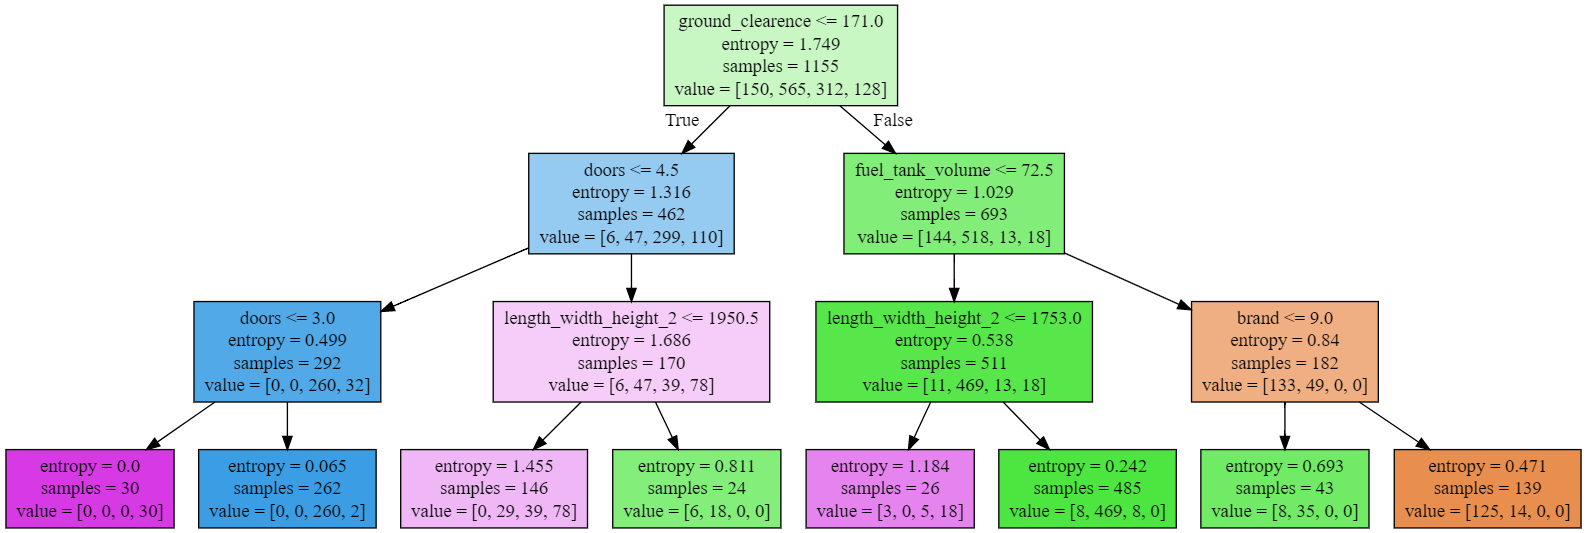

In [57]:
# продемонстрируем  дерево с глубиной 3
display1.Image("./graphviz_3.png",width=1200,height=768)

Для наглядности, обьясним как модель принимает решение на прмере дерева с глубиной 3:
 Разберем структуру логического блока:
 - ground_clearence <=171 (указан признак и его значения по которому происходит разделение)
 - entropy - мера информации (мера снятия неопределенности). Чем меньше- тем лучше. Если равна 0 то можно однозначно сказать что обьект относится к определенному классу и ветвление дальше не пойдет
 - сколько значений обрабатывается в данном узле. К примеру в верхнем 1155, это весь трейновый датасэт.
 - value - в этом параметре 4 значения (т.к. у нас 4 класса) Количество говорит - сколько в данном узле какого класса. К примеру entropy=0, samples=30, value=[0,0,0,30]. Говорит о отм что все 30 обьектов принадлежат к 4 классу.
 
   На выходе мы получили  условые классы их больше 4 т.к. энтропия в некоторых из них больше 0. По оттенку цвета мы так же можем понимать какого типа обьектов в данном узле больше всего
   
Одними из ключевых параметров по которым можно классифицировать авто:
- клиренс
- количество дверей
- размер бензобака
В целом эти параметры совпадают с анализом ``Mutual Information``  и ``SelectKBest``,которые мы проводили при отборе признаков


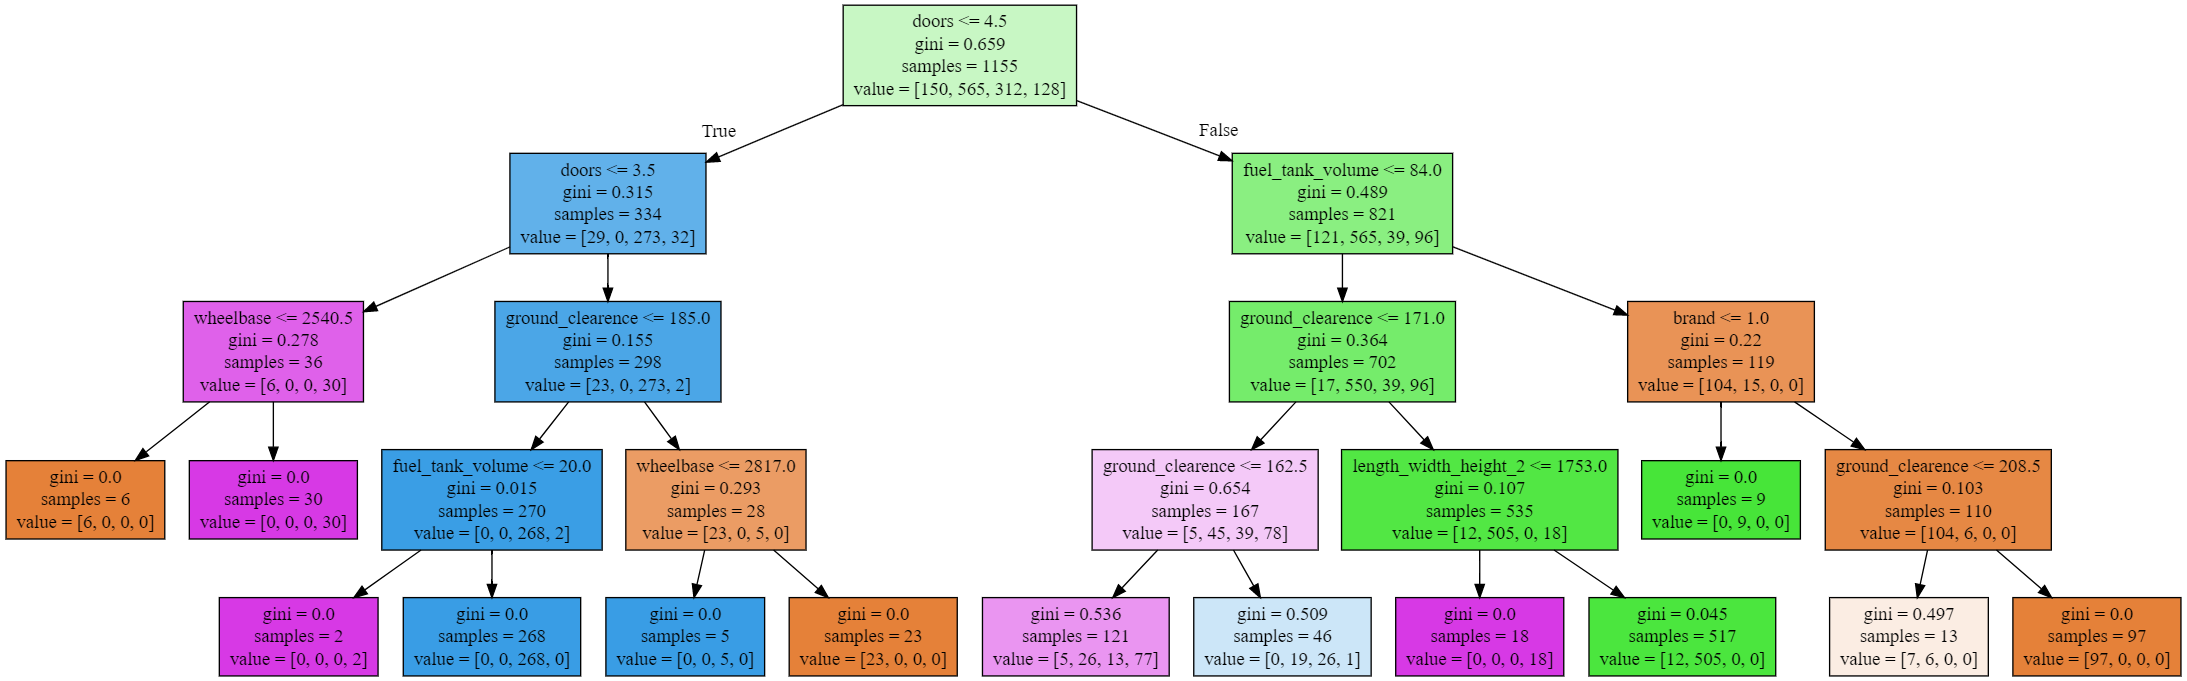

In [60]:
# продемонстрируем полное дерево 
display1.Image("./graphviz.png",width=3600,height=1600)

Ниже мы продемонстрировали целое дерево, по которому можно определить как модель принимает решения. Возможно оно сложно для восприятия, но зато мы можем обьяснить заказчику как работает наша модель.

### Вывод: <a id='outcome'></a>

В данной работе мы провели
- предобработку данных, 
- подготовили данные для модели
- обосновали метрику качество
- выбрали модель и обосновали рассмтриваемые модели
- продемострировали работу модели на тестовой выборки и визуализировали результат

В нашем случае был ограниченный по размеру датасэта и мы использовали кроссвалидацию данных при обучении. Получив высокие метрики, было понятно что в нашем случае не требуются более сложные ансамблевые модели. 
Классификатор, созданный нами имеет очень высокую точность, он ошибается всего 0,3% случаев

In [62]:
from sklearn.feature_selection import VarianceThreshold